<AxesSubplot: >

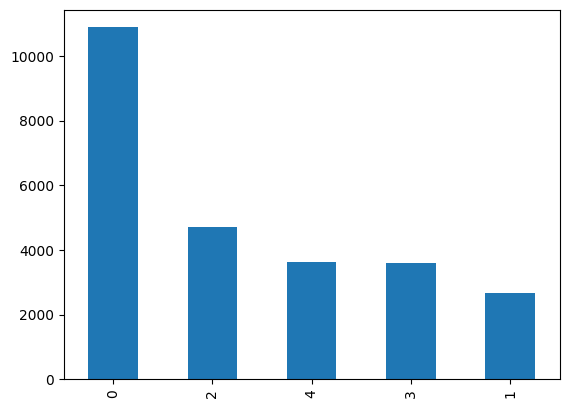

In [1]:
import nltk
nltk.data.path.insert(0, "F:\\nltk_data")
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel


df = pd.read_csv('tweets.csv', encoding='utf-8')

# 分詞和停用
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['text'].apply(lambda x: [w.lower() for w in tokenizer.tokenize(str(x)) if w.lower() not in stop_words])

# 建構辭典
dictionary = Dictionary(df['tokens'].tolist())

#過濾掉次數低於5次
dictionary.filter_extremes(no_below=5)

# bow
df['bow'] = df['tokens'].apply(lambda x: dictionary.doc2bow(x))

#LDA
num_topics = 5
lda_model = LdaModel(df['bow'].tolist(), num_topics=num_topics, id2word=dictionary)

#推斷主題
df['topic'] = df['bow'].apply(lambda x: max(lda_model[x], key=lambda item: item[1])[0])

df['topic'].value_counts().plot(kind='bar')

#df.to_csv('labeled_tweets.csv')